## Install the requisite libraries/packages

In [ ]:
!pip install scrapy

In [ ]:
!pip install beautifulsoup4

In [ ]:
!pip install odfpy

In [ ]:
!pip install Datasets

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from datasets import Dataset, load_dataset

In [ ]:
!scrapy startproject libretextbooks 


New Scrapy project 'libretextbooks', using template directory '/usr/local/lib/python3.9/dist-packages/scrapy/templates/project', created in:
    /content/libretextbooks

You can start your first spider with:
    cd libretextbooks
    scrapy genspider example example.com


## Scrape hyperlinks to textbooks

In [ ]:
#create link scraper
link_scraping_spider = """

import scrapy
import pandas as pd
import logging
from scrapy.linkextractors import LinkExtractor


def clean_and_filter(df: pd.DataFrame):
  df = df.drop_duplicates()
  df = df.dropna()
  df = df[df.a.str.contains("https://chem.libretexts.org/Bookshelves/")]
  return df 


class BookSpider(scrapy.Spider):
    name = 'book_spider'
    start_urls = ['https://chem.libretexts.org/Bookshelves']
    custom_settings = {
        "DEPTH_LIMIT": 9
    }
    logging.getLogger('scrapy').propagate = False

    empty_list = []

    def parse(self, response):
        # Extract all links from a page
        links = response.css('a::attr(href)').getall()
        df_links = pd.DataFrame(links, columns=['a'])

        # Clean and merge the links
        if len(self.empty_list) > 2:
            df_links_old = pd.concat(self.empty_list)
            df_links_old = clean_and_filter(df_links_old)
            df_links = pd.concat([df_links_old, df_links])

        df_links = clean_and_filter(df_links)

        # Update empty_list
        self.empty_list.append(df_links)

        if len(self.empty_list) > 2:
            df_links = pd.concat(self.empty_list)
            df_links = clean_and_filter(df_links)

        # Save links to a CSV file
        df_links.to_csv('book_links.csv')

        print(len(df_links))

        # Follow the links
        for link in df_links.a:
            yield scrapy.Request(response.urljoin(link), callback=self.parse)
"""


In [ ]:
# Create and write to a spider file
with open('/content/libretextbooks/libretextbooks/spiders/book_spider.py', 'w') as file:
    file.write(link_scraping_spider)

# Verify the content of the file by reading and printing it
# with open('/content/libretextbooks/libretextbooks/spiders/book_spider.py', 'r') as file:
#     content = file.read()
#     print(content)


In [ ]:
!cd libretextbooks && scrapy crawl book_spider -o book_spider.json

2023-04-13 01:28:33 [asyncio] DEBUG: Using selector: EpollSelector
2023-04-13 01:28:34 [protego] DEBUG: Malformed rule at line 4 : cannot set request rate using '1/5'. Ignoring this rule.
8
9
22
32
45
58
85
109
117
119
128
149
158
167
169
585
592
596
599
601
609
611
623
649
650
651
653
663
692
693
694
702
708
709
709
711
713
727
729
731
732
746
748
753
758
770
774
803
804
820
827
831
832
834
836
837
838
844
844
845
848
859
860
861
863
864
866
869
869
870
882
884
888
890
890
892
894
894
895
895
895
896
896
896
896
897
897
897
897
901
905
905
906
907
907
907
907
908
908
909
910
911
911
912
912
914
915
915
915
915
915
915
920
923
923
924
926
927
931
932
932
932
941
941
941
942
943
947
952
953
957
958
958
959
962
963
964
973
974
975
976
977
978
981
981
982
982
983
984
988
988
988
988
988
994
998
998
998
998
998
998
998
998
998
999
1004
1008
1009
1014
1015
1018
1019
1021
1022
1023
1025
1026
1027
1029
1030
1031
1032
1035
1038
1040
1045
1053
1054
1055
1058
1059
1060
1061
1062
1063
1068
1069
1

In [ ]:
links = (pd.read_csv('/content/libretextbooks/book_links.csv'))['a'].values.tolist()
print(links)

['https://chem.libretexts.org/Bookshelves/Introductory_Chemistry', 'https://chem.libretexts.org/Bookshelves/General_Chemistry', 'https://chem.libretexts.org/Bookshelves/Organic_Chemistry', 'https://chem.libretexts.org/Bookshelves/Inorganic_Chemistry', 'https://chem.libretexts.org/Bookshelves/Analytical_Chemistry', 'https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps', 'https://chem.libretexts.org/Bookshelves/Biological_Chemistry', 'https://chem.libretexts.org/Bookshelves/Environmental_Chemistry', 'https://chem.libretexts.org/Bookshelves/Analytical_Chemistry/Supplemental_Modules_(Analytical_Chemistry)', 'https://chem.libretexts.org/Bookshelves/Environmental_Chemistry/Supplemental_Modules_(Environmental_Chemistry)', 'https://chem.libretexts.org/Bookshelves/Environmental_Chemistry/Geochemistry_(Lower)', 'https://chem.libretexts.org/Bookshelves/Environmental_Chemistry/Environmental_Toxicology_(van_Gestel_et_al.)', 'https://chem.libretexts.org/Bookshelve

In [ ]:
def longest_link_with_shared_sublinks(links):
    result = []
    links = sorted(links, key=len, reverse=True)  # Sort links by length (longest first)

    for s1 in links:
        has_shared_sublink = False
        for s2 in result:
            if s1 in s2:
                has_shared_sublink = True
                break
        if not has_shared_sublink:
            result.append(s1)

    return result


# Find the longest hyperlinks with shared sublinks
longest_links = longest_link_with_shared_sublinks(links)

# Print the result
print(longest_links)
len(longest_links)


['https://chem.libretexts.org/Bookshelves/Inorganic_Chemistry/Supplemental_Modules_and_Websites_(Inorganic_Chemistry)/Descriptive_Chemistry/Elements_Organized_by_Block/1_s-Block_Elements/Group__2_Elements%3A_The_Alkaline_Earth_Metals/1Group_2%3A_Chemical_Reactions_of_Alkali_Earth_Metals/The_Solubility_of_the_Hydroxides_Sulfates_and_Carbonates', 'https://chem.libretexts.org/Bookshelves/Inorganic_Chemistry/Supplemental_Modules_and_Websites_(Inorganic_Chemistry)/Descriptive_Chemistry/Elements_Organized_by_Block/1_s-Block_Elements/Group__2_Elements%3A_The_Alkaline_Earth_Metals/1Group_2%3A_Chemical_Reactions_of_Alkali_Earth_Metals/The_Thermal_Stability_of_the_Nitrates_and_Carbonates', 'https://chem.libretexts.org/Bookshelves/Physical_and_Theoretical_Chemistry_Textbook_Maps/Supplemental_Modules_(Physical_and_Theoretical_Chemistry)/Electronic_Structure_of_Atoms_and_Molecules/Prediction_of_Aromatic_Anti_Aromatic_and_Non_Aromatic_Character_of_Heterocyclic_Compounds_along_with_their_Omission_Beh

5026

In [ ]:
filtered_links = pd.DataFrame(longest_links, columns=['url'])
filtered_links.to_csv('filtered_links.csv')

In [ ]:
len(filtered_links)

5026

## Scrape textbooks

In [ ]:
chapter_scraper_spider = """
import scrapy
import pandas as pd
from scrapy.linkextractors import LinkExtractor
import logging
empty_list = []

class BookSpider(scrapy.Spider):
    name = 'book_spider'
    custom_settings = {
        "DEPTH_LIMIT": 1
    }
    start_urls = (pd.read_csv('/content/filtered_links.csv'))['url'].values.tolist()
    logging.getLogger('scrapy').propagate = False
    def parse(self, response):

        # Extract text from the page
        text = response.css('p::text').getall()
        
        # Save the HTML content of the page just once

        yield {'url': response.url, 'html': text}
"""

In [ ]:
# Create and write to a spider file
with open('/content/libretextbooks/libretextbooks/spiders/book_spider.py', 'w') as file:
    file.write(chapter_scraper_spider)

# Verify the content of the file by reading and printing it
# with open('/content/libretextbooks/libretextbooks/spiders/book_spider.py', 'r') as file:
#     content = file.read()
#     print(content)


In [ ]:
!cd libretextbooks && scrapy crawl book_spider -o book_spider.json

2023-04-13 13:40:16 [asyncio] DEBUG: Using selector: EpollSelector
2023-04-13 13:40:17 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): publicsuffix.org:443
2023-04-13 13:40:17 [urllib3.connectionpool] DEBUG: https://publicsuffix.org:443 "GET /list/public_suffix_list.dat HTTP/1.1" 200 78775
2023-04-13 13:40:17 [protego] DEBUG: Malformed rule at line 4 : cannot set request rate using '1/5'. Ignoring this rule.


## Clean data

In [ ]:
# load scraped content
with open('/content/libretextbooks/book_spider.json', 'r') as file:
    content = file.read()


In [ ]:
#bug fix to let pandas read the file
content = content.replace('][', ',')

In [ ]:
scraped_content = pd.read_json(content)

In [ ]:
# find the top 1000 sentances
# First split the cell contents by "."
df_split = pd.DataFrame()
df_split['split'] = scraped_content['html'].apply(lambda x: x.split('. ') if isinstance(x, str) else x)

# Stack the DataFrame and reset the index
df_stacked = df_split.stack().reset_index(drop=True)

# Explode the lists into a single column with unique rows
df_exploded = df_stacked.explode()

# Remove empty strings from the DataFrame
df_exploded = df_exploded[df_exploded != '']

# Reset the index and rename the column
df_exploded = df_exploded.reset_index(drop=True)
df_exploded = df_exploded.to_frame('Sentences')

# Display the new DataFrame
print(df_exploded.value_counts().reset_index().head(1000).to_csv('top_sentances.csv'))


None


In [ ]:
sentances_to_remove = pd.read_excel("/content/sentances_to_remove.ods")
sentances_to_remove = sentances_to_remove[sentances_to_remove['Delete']== 'x']['Sentences'].tolist()

In [ ]:
df_text_to_remove = pd.read_json('/content/lines_to_remove.jsonl', lines= True)

In [ ]:
text_to_remove = df_text_to_remove[df_text_to_remove['answer']=='reject']['text'].tolist()

In [ ]:
text_to_remove.append('selected template will load here This action is not available.')

In [ ]:
text_to_remove = [*text_to_remove + sentances_to_remove ]

In [ ]:
# Replacement value
replacement_value = ' '

# Function to replace substrings in a cell value
def replace_substrings(cell):
    cell = ' '.join(cell)
    cell = cell.split('is shared under a')
    cell = cell[0]

    for s in text_to_remove:
        s = s.strip()
        cell = cell.replace(s, replacement_value)
    return cell


# Replace all instances of the substrings in the DataFrame
scraped_content['html'] = scraped_content['html'].apply(replace_substrings)

# Print the updated DataFrame
print("\nUpdated DataFrame:")
print(scraped_content)


Updated DataFrame:
                                                    url  \
0     https://chem.libretexts.org/Bookshelves/Physic...   
1     https://chem.libretexts.org/Bookshelves/Inorga...   
2     https://chem.libretexts.org/Bookshelves/Inorga...   
3     https://chem.libretexts.org/Bookshelves/Inorga...   
4     https://chem.libretexts.org/Bookshelves/Inorga...   
...                                                 ...   
5021  https://chem.libretexts.org/Bookshelves/Analyt...   
5022  https://chem.libretexts.org/Bookshelves/Organi...   
5023  https://chem.libretexts.org/Bookshelves/Introd...   
5024  https://chem.libretexts.org/Bookshelves/Inorga...   
5025  https://chem.libretexts.org/Bookshelves/Genera...   

                                                   html  
0       \n\n\n\n \n\n\n\n\n\n \n The pre-exponential...  
1       \n\n \n This page discusses the solubility o...  
2       \n\n \n Group 2 elements (beryllium, magnesi...  
3       \n\n \n This page examines at t

In [ ]:
scraped_content['text_length'] = scraped_content.html.str.len()

In [ ]:
scraped_content['text_length'].describe()

count     5026.000000
mean      5740.119379
std       8094.809836
min         11.000000
25%        566.000000
50%       3002.000000
75%       7715.750000
max      98786.000000
Name: text_length, dtype: float64

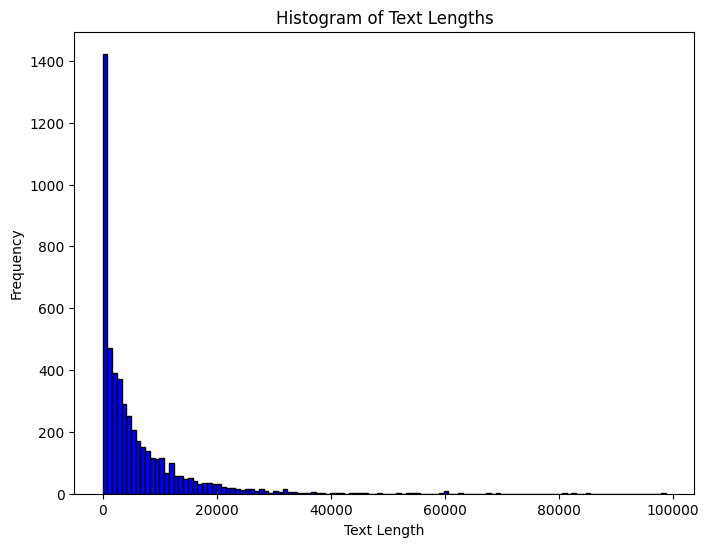

In [ ]:
# Histogram of text lengths
plt.figure(figsize=(8, 6))
plt.hist(scraped_content['text_length'], bins='auto', color='blue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Histogram of Text Lengths')
plt.show()

In [ ]:
## only keep pages with content above 500 characters
scraped_content = scraped_content[scraped_content['text_length'] > 600]

In [ ]:
scraped_content

## Upload to HF

In [ ]:
dataset = Dataset.from_pandas(scraped_content)

In [ ]:
#!huggingface-cli login

dataset.push_to_hub("Hack90/libre_chem_textbooks") # works fine, no errors

reloaded_dataset = load_dataset("Hack90/libre_chem_textbooks")

Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/3740 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/Hack90___parquet/Hack90--libre_chem_textbooks-484ca6e3181a8942/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
reloaded_dataset

DatasetDict({
    train: Dataset({
        features: ['url', 'html', 'text_length', '__index_level_0__'],
        num_rows: 3740
    })
})